# **Assignment** - **2** 

In [376]:
#Importing all the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

# **Data** **Splitting**

**Task** - **1**

In [377]:
#Task 1
def split_data(data,ratio):
  np.random.seed(42)
  #Shuffling the data so as to randomnly choose the train and test set
  shuffle = np.random.permutation(len(data))
  set_size = int(len(data)*ratio)
  #Dividing the given data into Test and Train dataset
  test_index = shuffle[:set_size]
  train_index = shuffle[set_size:]
  return data.iloc[train_index],data.iloc[test_index]

In [378]:
#Reading the given dataset 
data = pd.read_csv("Advertising Dataset.csv")
test_data,train_data = split_data(data,0.75)
#Printing the test_data and train_data shape to check if they are allotted properly
print('Shape of Test Data:',test_data.shape)
print('Shape of Training data:',train_data.shape)
#Printing the head of the data so as check features available
print('The Data:')
data.head()

Shape of Test Data: (50, 5)
Shape of Training data: (150, 5)
The Data:


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [379]:
#Getting some details about the training set
print('The Training Data')
print(train_data.shape)
#Printing the head of the data so as check features available
train_data.head()

The Training Data
(150, 5)


,Unnamed: 0,TV,radio,newspaper,sales
95,96,163.3,31.6,52.9,16.9
15,16,195.4,47.7,52.9,22.4
30,31,292.9,28.3,43.2,21.4
158,159,11.7,36.9,45.2,7.3
128,129,220.3,49.0,3.2,24.7


In [380]:
#Getting some details about the testing set
print('The Test Data')
print(test_data.shape)
#Printing the head of the data so as check features available
test_data.head()

The Test Data
(50, 5)


,Unnamed: 0,TV,radio,newspaper,sales
176,177,248.4,30.2,20.3,20.2
181,182,218.5,5.4,27.4,12.2
89,90,109.8,47.8,51.4,16.7
8,9,8.6,2.1,1.0,4.8
13,14,97.5,7.6,7.2,9.7


In [381]:
#Creating the training data , by allocating the features to the sales
X_train,y_train = np.array([train_data['TV'].values,train_data['radio'].values,train_data['newspaper'].values]),(train_data['sales'].values).reshape(1,150)
print(X_train.shape,y_train.shape)

(3, 150) (1, 150)


# **Multiple** **Linear** **Regression** **Model**

**Task** - **2**

In [382]:
#Task2
#Calculating the mean of tv,radio,newspaper and sales
x_mean = np.mean(X_train,axis=1,keepdims=True)
y_mean = np.mean(y_train)
print('X-mean:',x_mean)
print('Y-mean:',y_mean)

X-mean: [[144.71466667]
 [ 23.416     ]
 [ 30.06533333]]
Y-mean: 13.981333333333332


In [383]:
#Calculating the required so as to find w-matrix
covariance = np.dot((X_train-x_mean),(y_train-y_mean).T)
var = np.dot((X_train-x_mean),(X_train-x_mean).T)
#Taking inverse of variance matrix
var = np.linalg.inv(var)

In [384]:
#Calculating the coeff-matrix
w=np.dot(covariance.T,var)
#Calculating the bias for the model
b=y_mean-np.dot(w,x_mean)
print('Co-efficients:',w)
print('Bias:',b)


Co-efficients: [[ 0.04575751  0.18843966 -0.00578168]]
Bias: [[3.12087614]]


In [385]:
#Using the Python Model To predict the co-efficients and intercept
reg = LinearRegression().fit(X_train.T, y_train.T)
reg.score(X_train.T, y_train.T)
#Printing those values
print('Co-efficients:',reg.coef_)
print('Bias:',reg.intercept_)

Co-efficients: [[ 0.04575751  0.18843966 -0.00578168]]
Bias: [3.12087614]


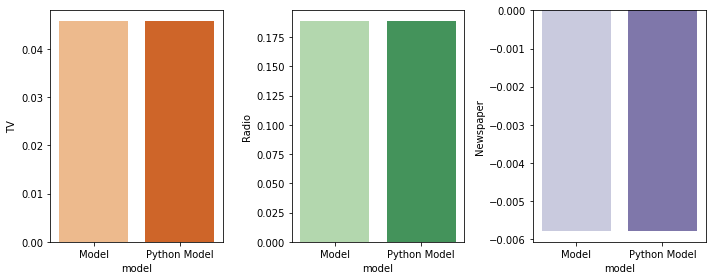

In [386]:
#Comparing co-efficients by plotting in a Bar Plot
new_df = [{'TV': w[0][0],'Radio':w[0][1] ,'Newspaper':w[0][2]}, 
          {'TV': reg.coef_[0][0],'Radio':reg.coef_[0][1] ,'Newspaper':reg.coef_[0][2]}]
df = pd.DataFrame(new_df,index =['Model', 'Python Model'])
model = ['Model','Python Model']
df['model'] = model
#Plottinf the bar plots , thus comparing them using seaborn
fig, axs = plt.subplots(figsize=(10,4),ncols=3)
sns.barplot(data= df,x="model", y="TV", palette="Oranges" ,ax=axs[0])
sns.barplot(data= df,x="model", y="Radio", palette="Greens",ax=axs[1])
sns.barplot(data= df,x="model", y="Newspaper", palette="Purples",ax=axs[2])
plt.tight_layout()

**Task** - **3**

In [387]:
#Task-3
#Allocating our attributes and sales to corresponding test data
X_test , y_test = np.array([test_data['TV'].values,test_data['radio'].values,test_data['newspaper'].values]) , test_data['sales'].values

In [388]:
#Predicting the the X_test values  
y_pred= b + np.dot(w,X_test)

#Calculating and Printing the Mean Square error
mse=np.sum((y_pred-y_test)**2)
n=X_test.shape[1]
mse = (mse/n)
print('Mean Sqaured Error:',mse)


Mean Sqaured Error: 3.4531805967396734


# **Ridge** **Regression**

**Task** - **4**

In [389]:
#Task-4
#Performing Ridge regression , thus alloting the required variables
lmbda=[0.5, 1, 5, 10, 50, 100]
I=np.identity(X_train.shape[0])
coefs_mean =[]
coefs_max=[]
coefs=[]
mse=[]
b_rr=[]

In [390]:
#Going into a loop to calculate 
for l in lmbda:
  #Finding the w-matrix for the ridge regression,for different lambdas
  cov_ridge = np.dot((X_train-x_mean),(y_train-y_mean).T)
  var_ridge = np.linalg.inv(np.dot((X_train-x_mean),(X_train-x_mean).T)+l*I)
  w_ridge=(np.dot(var_ridge,cov_ridge)).T
  #Finding the intercept for different lambdas
  b_ridge=y_mean-np.dot((w_ridge),x_mean)
  b_rr.append(b_ridge.tolist())

  coefs.append(w_ridge[0].tolist())
  coefs_max.append(np.max(w_ridge[0]).tolist())
  coefs_mean.append(np.mean(w_ridge[0]).tolist())
  #Finding the mean squared error for different lambdas
  
  y_pred= b_ridge + np.dot(w_ridge,X_test)
  mse_ridge=np.sum((y_pred-y_test)**2)
  n=X_test.shape[1]
  mse_ridge = (mse_ridge/n)
  mse.append(mse_ridge)

In [391]:
#Printing the above obtained results
for i in range(6):
  print('Lambda =',lmbda[i])
  print('Co-efficients :',coefs[i])
  print('Intercept :',b_rr[i])
  print('The mean squared error :',mse[i])

Lambda = 0.5
Co-efficients : [0.045757506915486454, 0.18843632919543382, -0.005780894973542443]
Intercept : [[3.120930422465282]]
The mean squared error : 3.453181682380154
Lambda = 1
Co-efficients : [0.04575750751400622, 0.18843300307552752, -0.005780112925447722]
Intercept : [[3.120984707737769]]
The mean squared error : 3.4531827724979944
Lambda = 5
Co-efficients : [0.04575751227875822, 0.18840639854055324, -0.005773857894611344]
Intercept : [[3.1214189304121227]]
The mean squared error : 3.4531916545671315
Lambda = 10
Co-efficients : [0.04575751817620287, 0.1883731539285864, -0.005766042489570217]
Intercept : [[3.121961560041507]]
The mean squared error : 3.453203159691977
Lambda = 50
Co-efficients : [0.04575756302003052, 0.18810763849152612, -0.005703654321960516]
Intercept : [[3.1262966589008983]]
The mean squared error : 3.4533112451056627
Lambda = 100
Co-efficients : [0.0457576132552168, 0.18777684392386837, -0.005626005502837095]
Intercept : [[3.131700737099049]]
The mean squa

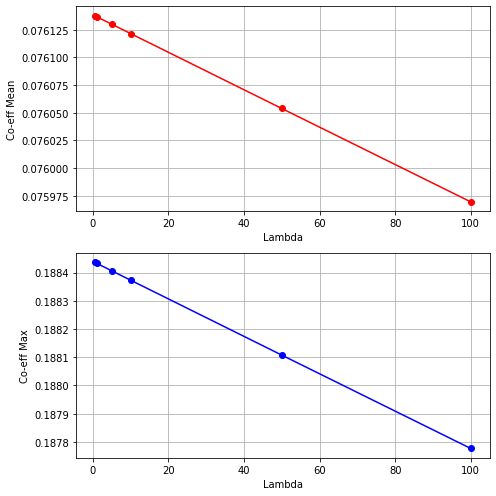

In [392]:
#Plotting the co-efficients against each other thereby comparting them
plt.figure(figsize=(7,7))
plt.title('Plotting the coefficients against each other')

#Plotting Co-eff mean v/s lambda
plt.subplot(2, 1, 1) 
plt.plot(lmbda,coefs_mean,'ro-')
plt.xlabel('Lambda',fontsize=10)
plt.ylabel('Co-eff Mean',fontsize=10)
plt.grid(True)

#Plotting Co-eff max v/s lambda
plt.subplot(2, 1, 2)
plt.plot(lmbda,coefs_max,'bo-')
plt.xlabel('Lambda',fontsize=10)
plt.ylabel('Co-eff Max',fontsize=10)
plt.grid(True) 

plt.tight_layout()

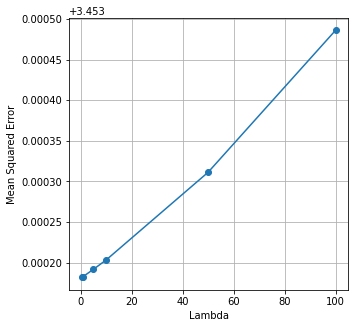

In [393]:
#Comparing the Mean Squared Error for different Lambda's
plt.figure(figsize=(5,5))
plt.plot(lmbda,mse,'o-')
plt.ylabel('Mean Squared Error',fontsize=10)
plt.xlabel('Lambda',fontsize=10)
plt.grid(True) 

# **Lasso** **Regression**

**Task** - **5**

[ 0.04569456  0.18523656 -0.00406609]
[ 0.04563146  0.18203603 -0.00235105]
[0.04524952 0.16237428 0.        ]
[0.04480362 0.13933604 0.        ]
[0.04077729 0.         0.        ]
[0.03396629 0.         0.        ]


Text(0, 0.5, 'Co-efficients')

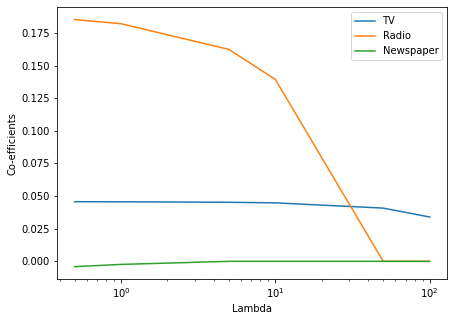

In [394]:
#Task-5
#Lasso Regression
lasso = Lasso()
coeff=[]
alphas = [0.5, 1, 5, 10, 50, 100]
most_imp=''
#Finding the coeff for different alphas 
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train.T, y_train.T)
    coeff.append(lasso.coef_)
    print(lasso.coef_)
    if(((lasso.coef_[0]==0) and (lasso.coef_[1]==0)) or((lasso.coef_[2]==0) and (lasso.coef_[1]==0)) or ((lasso.coef_[2]==0)and (lasso.coef_[1]==0))):
      if lasso.coef_[2]==0 and lasso.coef_[1]==0 :
        most_imp='TV'
      if lasso.coef_[2]==0 and lasso.coef_[0]==0 :
         most_imp='Radio'
      if lasso.coef_[0]==0 and lasso.coef_[1]==0:
         most_imp='Newspaper'
#Plotting Co-efficients vs Lambda
plt.figure(figsize=(7,5))   
ax = plt.gca()
ax.plot(lmbda, coeff)
ax.set_xscale('log')
plt.axis('tight')
plt.legend(('TV','Radio','Newspaper'))
plt.xlabel('Lambda')
plt.ylabel('Co-efficients')

In [395]:
#The most important feature is the that doesnt goes zero last, hence from curve it is clear that it is radi
print("Thus, it is clear from the curve and the co-efficient values that the most important feature is:",most_imp)

Thus, it is clear from the curve and the co-efficient values that the most important feature is: TV


Alternate ways of plotting Co-eff v/s Lambda

Text(0, 0.5, 'Coefficients')

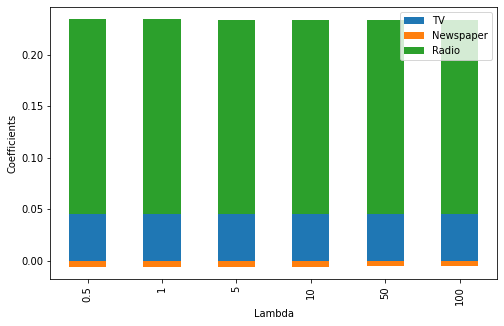

In [396]:
#Alternative methods of Plotting co-efficients from Ridge Regression
#Allocating necessary variables
tv=[]
radio=[]
newspaper=[]
for i in range(6):
  tv.append(coefs[i][0])
  radio.append(coefs[i][1])
  newspaper.append(coefs[i][2])
#Plotting these variables against lambda
lmbda=['0.5', '1', '5', '10', '50', '100']
#Forming a dataframe before plotting
data_frame = pd.DataFrame({'TV': tv,
                    'Newspaper': newspaper,       
                    'Radio':radio}, index=lmbda)
#Thus plotting them
data_frame.plot.bar(stacked=True,figsize=(8,5)) 
plt.xlabel('Lambda')
plt.ylabel('Coefficients')

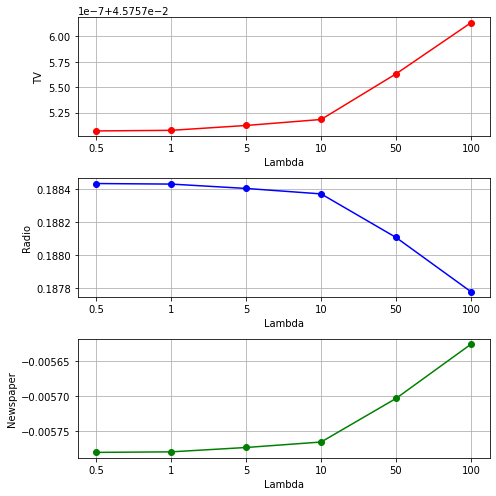

In [397]:
#Plotting each feature against lambda
plt.figure(figsize=(7,7))

#plotting TV feature v/s lambda
plt.subplot(3, 1, 1) 
plt.plot(lmbda,tv,'ro-')
plt.xlabel('Lambda',fontsize=10)
plt.ylabel('TV',fontsize=10)
plt.grid(True)

#Plotting Radio feature v/s Lambda
plt.subplot(3, 1, 2)
plt.plot(lmbda,radio,'bo-')
plt.xlabel('Lambda',fontsize=10)
plt.ylabel('Radio',fontsize=10)
plt.grid(True)

#Plotting Newspaper feature v/s Lambda
plt.subplot(3, 1, 3)
plt.plot(lmbda,newspaper,'go-')
plt.xlabel('Lambda',fontsize=10)
plt.ylabel('Newspaper',fontsize=10)
plt.grid(True)

plt.tight_layout()